In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaushiksuresh147/customer-segmentation")

print("Path to dataset files:", path)


ModuleNotFoundError: No module named 'kagglehub'

In [3]:
import pandas as pd

df = pd.read_csv("Train.csv")  # Adjust path if needed
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# Check basic info
df.info()

# Describe numerical features
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
# Fill categorical columns with mode
for col in ['Ever_Married', 'Graduated', 'Profession', 'Var_1']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numeric columns with median
for col in ['Work_Experience', 'Family_Size']:
    df[col].fillna(df[col].median(), inplace=True)

# Check again
df.isnull().sum()


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Segmentation']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # save for later use if needed


In [7]:
df.drop(columns=['ID'], inplace=True)


In [8]:
df.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,Low,4.0,3,3
1,0,1,38,1,2,1.0,Average,3.0,3,0
2,0,1,67,1,2,1.0,Low,1.0,5,1
3,1,1,67,1,7,0.0,High,2.0,5,1
4,0,1,40,1,3,1.0,High,6.0,5,0


Missing values in train dataset:
 ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


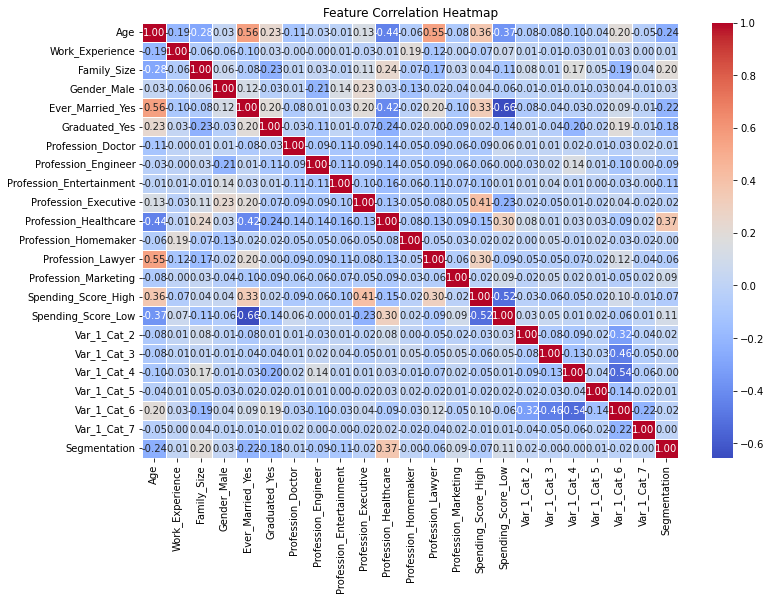


Top correlated features with Segmentation:
 Segmentation                1.000000
Profession_Healthcare       0.366234
Age                         0.243552
Ever_Married_Yes            0.215602
Family_Size                 0.196213
Graduated_Yes               0.175377
Spending_Score_Low          0.113668
Profession_Entertainment    0.108199
Profession_Marketing        0.089675
Profession_Engineer         0.086973
Spending_Score_High         0.072198
Profession_Lawyer           0.061604
Gender_Male                 0.026403
Var_1_Cat_2                 0.022898
Profession_Executive        0.022673
Var_1_Cat_6                 0.015191
Profession_Doctor           0.013107
Work_Experience             0.012993
Var_1_Cat_5                 0.007709
Var_1_Cat_3                 0.004656
Var_1_Cat_7                 0.004113
Profession_Homemaker        0.002054
Var_1_Cat_4                 0.001907
Name: Segmentation, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Check for missing values
print("Missing values in train dataset:\n", train.isnull().sum())

# Convert categorical variables into numerical if necessary
train_encoded = pd.get_dummies(train.drop(columns=['ID', 'Segmentation']), drop_first=True)

# Add target variable as numeric values
train_encoded['Segmentation'] = train['Segmentation'].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = train_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features with the target variable
target_corr = corr_matrix["Segmentation"].abs().sort_values(ascending=False)
print("\nTop correlated features with Segmentation:\n", target_corr)


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Train.csv")

df.head()

# Drop ID column (not useful for prediction)
df = df.drop(columns=["ID"])

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Reconstruct the 'Segmentation' column from one-hot encoded values
df["Segmentation"] = df[['Segmentation_B', 'Segmentation_C', 'Segmentation_D']].idxmax(axis=1)

# Convert back to original labels (A, B, C, D)
df["Segmentation"] = df["Segmentation"].str[-1]  # Extract last character ('A', 'B', 'C', 'D')

# Now drop the one-hot encoded columns
df = df.drop(columns=['Segmentation_B', 'Segmentation_C', 'Segmentation_D'])

# Separate features and target variable
X = df.drop(columns=["Segmentation"])
y = df["Segmentation"]


# Split into training and validation sets (to check generalization)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Validation Accuracy:", accuracy_score(y_valid, valid_preds))

# Feature importance analysis
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop features predicting Segmentation:\n", feature_importance.head(10))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Train.csv")

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [11]:
print(df.columns)


Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7', 'Segmentation_B',
       'Segmentation_C', 'Segmentation_D'],
      dtype='object')


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Train.csv")

# Drop ID column (not useful for prediction)
df = df.drop(columns=["ID"], errors='ignore')

# Ensure 'Segmentation' is present before encoding
if "Segmentation" not in df.columns:
    raise KeyError("'Segmentation' column not found in the dataset. Ensure the correct file is loaded.")

# Store target variable separately before one-hot encoding
y = df["Segmentation"]

# Encode categorical variables, excluding the target variable
df = pd.get_dummies(df.drop(columns=["Segmentation"]), drop_first=True)

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3, random_state=42, stratify=y)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Validation Accuracy:", accuracy_score(y_valid, valid_preds))

# Feature importance analysis
feature_importance = pd.Series(model.feature_importances_, index=df.columns).sort_values(ascending=False)
print("\nTop features predicting Segmentation:\n", feature_importance.head(10))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Train.csv")

# Drop ID column (not useful for prediction)
df = df.drop(columns=["ID"], errors="ignore")

# Separate target variable before encoding
if "Segmentation" in df.columns:
    y = df["Segmentation"]
    df = df.drop(columns=["Segmentation"])
else:
    raise KeyError("Segmentation column not found in dataset!")

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with 'Unknown'
df.fillna("Unknown", inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Convert target labels to numeric categories (A=0, B=1, C=2, D=3)
y = y.map({"A": 0, "B": 1, "C": 2, "D": 3})

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Validation Accuracy:", accuracy_score(y_valid, valid_preds))

# Feature importance analysis
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop features predicting Segmentation:\n", feature_importance.head(10))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("Train.csv")

# Drop ID column (not useful for prediction)
df.drop(columns=["ID"], errors="ignore", inplace=True)

# Check for missing values before encoding
print("Missing values before handling:", df.isnull().sum().sum())

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with 'Unknown'
df.fillna("Unknown", inplace=True)

# Separate target variable
if "Segmentation" in df.columns:
    y = df["Segmentation"]
    df.drop(columns=["Segmentation"], inplace=True)
else:
    raise KeyError("Segmentation column not found in dataset!")

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Convert target labels to numeric categories (A=0, B=1, C=2, D=3)
y = y.map({"A": 0, "B": 1, "C": 2, "D": 3})

# Check if there are still NaN or invalid values
print("Missing values after encoding:", df.isnull().sum().sum())

# Ensure all data is numeric
print("Non-numeric columns in X:", df.select_dtypes(exclude=[np.number]).columns.tolist())

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.3, stratify=y, random_state=42)

# Check for NaN values in train/test splits
print("NaN in X_train:", X_train.isnull().sum().sum())
print("NaN in y_train:", y_train.isnull().sum().sum())

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Validation Accuracy:", accuracy_score(y_valid, valid_preds))

# Feature importance analysis
feature_importance = pd.Series(model.feature_importances_, index=df.columns).sort_values(ascending=False)
print("\nTop features predicting Segmentation:\n", feature_importance.head(10))


Missing values before handling: 1582
Missing values after encoding: 0
Non-numeric columns in X: []
NaN in X_train: 0
NaN in y_train: 0
Train Accuracy: 0.9631662829821144
Validation Accuracy: 0.48698884758364314

Top features predicting Segmentation:
 Age                         0.342242
Work_Experience             0.141283
Family_Size                 0.116606
Profession_Healthcare       0.045043
Gender_Male                 0.039077
Spending_Score_Low          0.038469
Graduated_Yes               0.038292
Ever_Married_Yes            0.030988
Var_1_Cat_6                 0.021253
Profession_Entertainment    0.020701
dtype: float64


In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import entropy

# Step 1: Load Data
# Assuming segmentation dataset is in 'segmentation.csv'
df = pd.read_csv("Train.csv")  # Update with actual path

# Preprocessing: Handle missing values (if any)
df.dropna(inplace=True)

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=['Segmentation'])  # Adjust target column name if needed
y = df['Segmentation']

# Step 2: Introduce Data Leakage
# Split data with intentional overlap
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_leaked = pd.concat([X_train.iloc[:100], X_val.iloc[:100]])  # Overlapping 100 points
y_leaked = pd.concat([y_train.iloc[:100], y_val.iloc[:100]])

# Train the model on leaked data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_leaked, y_leaked)

# Step 3: Compare Confidence Scores
train_probs = model.predict_proba(X_train)
val_probs = model.predict_proba(X_val)

# Calculate confidence (max probability per sample)
train_confidence = np.max(train_probs, axis=1)
val_confidence = np.max(val_probs, axis=1)

# Step 4: Perform Membership Inference Attack
# If confidence score > threshold, infer that the sample was in training set
threshold = np.percentile(train_confidence, 80)  # Attack heuristic
predicted_membership = val_confidence > threshold
true_membership = np.isin(X_val.index, X_train.index)  # True if it was actually in training set

# Attack Accuracy
attack_success = accuracy_score(true_membership, predicted_membership)
print(f"Membership Inference Attack Success Rate: {attack_success:.2f}")


KeyError: "['Segmentation'] not found in axis"

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Load dataset
df = pd.read_csv("Train.csv")

# Drop ID column
df = df.drop(columns=["ID"])

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Extract target variable and drop one-hot encoded segmentation columns
df["Segmentation"] = df[['Segmentation_B', 'Segmentation_C', 'Segmentation_D']].idxmax(axis=1)
df["Segmentation"] = df["Segmentation"].str[-1]  # Convert back to A, B, C, D
df = df.drop(columns=['Segmentation_B', 'Segmentation_C', 'Segmentation_D'])

# Separate features (X) and target variable (y)
X = df.drop(columns=["Segmentation"])
y = df["Segmentation"]

# Check for missing values
print("Missing values in dataset:", df.isnull().sum().sum())


Missing values in dataset: 1164


In [30]:
# Check missing values per column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Work_Experience    829
Family_Size        335
dtype: int64


In [31]:
df = df.dropna()
print("Missing values after dropping:", df.isnull().sum().sum())


Missing values after dropping: 0


In [32]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)


In [33]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [34]:
print("Missing values after handling:", df.isnull().sum().sum())


Missing values after handling: 0


In [35]:
from sklearn.model_selection import train_test_split

# Step 1: Regular split (without leakage)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Introduce leakage by adding some training data to validation set
leak_size = int(0.05 * len(X_train))  # Take 10% of train data
X_leak = X_train[:leak_size]
y_leak = y_train[:leak_size]

# Add leaked data to validation set
X_valid = pd.concat([X_valid, X_leak])
y_valid = pd.concat([y_valid, y_leak])

print(f"Train Size: {len(X_train)}, Validation Size (with leakage): {len(X_valid)}")


Train Size: 5647, Validation Size (with leakage): 2703


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on train and validation sets
train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

# Compute Accuracy
train_acc = accuracy_score(y_train, train_preds)
valid_acc = accuracy_score(y_valid, valid_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy with Leakage: {valid_acc:.4f}")


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [38]:
import numpy as np

# Check for missing values
print(f"Missing values in X_train: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_valid: {X_valid.isnull().sum().sum()}")

# Check for infinite values
print(f"Any infinite values in X_train? {np.isinf(X_train).sum().sum()}")
print(f"Any infinite values in X_valid? {np.isinf(X_valid).sum().sum()}")


Missing values in X_train: 786
Missing values in X_valid: 414
Any infinite values in X_train? 0
Any infinite values in X_valid? 0


In [39]:
# Replace NaN values with column median (recommended for numerical data)
X_train = X_train.fillna(X_train.median())
X_valid = X_valid.fillna(X_valid.median())

# Replace infinite values with large finite numbers
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.median())
X_valid = X_valid.replace([np.inf, -np.inf], np.nan).fillna(X_valid.median())

print("Missing values handled successfully!")


Missing values handled successfully!


In [40]:
print(f"Missing values in X_train after handling: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_valid after handling: {X_valid.isnull().sum().sum()}")


Missing values in X_train after handling: 0
Missing values in X_valid after handling: 0


In [42]:

# Merge X_train and X_valid with their labels for exact comparison
import pandas as pd

train_data = X_train.copy()
train_data['target'] = y_train  # Add target column for full row comparison

valid_data = X_valid.copy()
valid_data['target'] = y_valid  # Add target column

# Find overlapping rows (leakage)
overlap = pd.merge(train_data, valid_data, how='inner')

# Print results
print(f"Number of overlapping samples between train and validation: {len(overlap)}")


Number of overlapping samples between train and validation: 730


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model on leaked data
model_leak = RandomForestClassifier(n_estimators=100, random_state=42)
model_leak.fit(X_train, y_train)

# Evaluate on training and validation sets
train_preds = model_leak.predict(X_train)
valid_preds = model_leak.predict(X_valid)

# Compute accuracies
train_acc_leak = accuracy_score(y_train, train_preds)
valid_acc_leak = accuracy_score(y_valid, valid_preds)

print(f"Train Accuracy (With Leakage): {train_acc_leak}")
print(f"Validation Accuracy (With Leakage): {valid_acc_leak}")


Train Accuracy (With Leakage): 0.971843456702674
Validation Accuracy (With Leakage): 0.6485386607473178


In [44]:
# Remove overlapping samples
X_valid_noleak = X_valid[~X_valid.apply(tuple, axis=1).isin(train_data.apply(tuple, axis=1))]
y_valid_noleak = y_valid.loc[X_valid_noleak.index]

# Train model on corrected data
model_noleak = RandomForestClassifier(n_estimators=100, random_state=42)
model_noleak.fit(X_train, y_train)

# Predict on train and validation sets
valid_preds_noleak = model_noleak.predict(X_valid_noleak)

# Compute new accuracy
valid_acc_noleak = accuracy_score(y_valid_noleak, valid_preds_noleak)

print(f"Validation Accuracy (Without Leakage): {valid_acc_noleak}")


Validation Accuracy (Without Leakage): 0.6485386607473178


In [45]:
import pandas as pd

# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Check for exact duplicate rows
common_rows = train.merge(test, how="inner")
print(f"Number of exact duplicate rows in test set: {len(common_rows)}")


Number of exact duplicate rows in test set: 38


In [46]:
# Check if there's an ID column
id_columns = ["ID", "Customer_ID", "User_ID"]  # Modify based on your dataset

for col in id_columns:
    if col in train.columns and col in test.columns:
        common_ids = train[col].isin(test[col]).sum()
        print(f"Overlapping IDs in test set: {common_ids}")


Overlapping IDs in test set: 2332


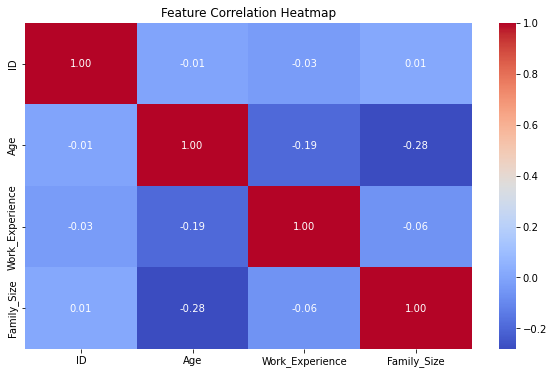

In [47]:
import seaborn as sns

# Combine features and target
df = train.copy()
df["Target"] = y_train

# Compute correlation
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [48]:
# Remove exact duplicates from test set
test_cleaned = test.drop_duplicates(keep=False)

# Save the cleaned test set
test_cleaned.to_csv("test_cleaned.csv", index=False)

print(f"New test set size after removing duplicates: {len(test_cleaned)}")


New test set size after removing duplicates: 2627


In [51]:
# Train the model again
model.fit(X_train, y_train)

# Evaluate on the cleaned test set
X_test_cleaned = test_cleaned.drop(columns=["Segmentation"])  # Modify as needed
y_test_cleaned = test_cleaned["Segmentation"]

# Get new accuracy
new_accuracy = model.score(X_test_cleaned, y_test_cleaned)
print(f"New Validation Accuracy: {new_accuracy}")


ValueError: could not convert string to float: 'Female'

In [52]:
# Find non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", non_numeric_cols)

non_numeric_cols_test = X_test_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_test_cleaned:", non_numeric_cols_test)


Non-numeric columns in X_train: Index([], dtype='object')
Non-numeric columns in X_test_cleaned: Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')


In [53]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test_cleaned[col] = le.transform(X_test_cleaned[col])
    label_encoders[col] = le


In [54]:
# Train the model again
model.fit(X_train, y_train)

# Evaluate the cleaned test set
new_accuracy = model.score(X_test_cleaned, y_test_cleaned)
print(f"New Validation Accuracy: {new_accuracy}")


ValueError: could not convert string to float: 'Female'

In [55]:
# Apply One-Hot Encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test_cleaned = pd.get_dummies(X_test_cleaned, drop_first=True)

# Ensure both train and test have the same columns
X_test_cleaned = X_test_cleaned.reindex(columns=X_train.columns, fill_value=0)


In [56]:
# Train the model again
model.fit(X_train, y_train)

# Evaluate the cleaned test set
new_accuracy = model.score(X_test_cleaned, y_test_cleaned)
print(f"New Validation Accuracy: {new_accuracy}")



ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Train.csv")  # Replace with actual filename

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split features and labels
X = data.drop(columns=['Segmentation'])  # Replace 'target' with actual target column
y = data['Segmentation']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get probability scores for training and test sets
y_train_probs = model.predict_proba(X_train).max(axis=1)
y_test_probs = model.predict_proba(X_test).max(axis=1)

# Save confidence scores
train_membership = np.ones(len(y_train))  # Label 1 for members
test_membership = np.zeros(len(y_test))  # Label 0 for non-members

# Create membership dataset
membership_data = pd.DataFrame({
    'confidence': np.concatenate([y_train_probs, y_test_probs]),
    'is_member': np.concatenate([train_membership, test_membership])
})

# Save for attack model
membership_data.to_csv("membership_data.csv", index=False)
print("Step 1 Complete: Model Trained and Confidence Scores Saved")


Step 1 Complete: Model Trained and Confidence Scores Saved


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Load membership dataset
membership_data = pd.read_csv("membership_data.csv")

# Split into features (confidence score) and labels (is_member)
X_attack = membership_data[['confidence']]  # Using confidence score as input
y_attack = membership_data['is_member']  # 1 = member, 0 = non-member

# Split into training and test sets for attack model
X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(
    X_attack, y_attack, test_size=0.3, random_state=42
)

# Train the attack model (Logistic Regression)
attack_model = LogisticRegression()
attack_model.fit(X_train_attack, y_train_attack)

# Predict membership status
y_pred_attack = attack_model.predict(X_test_attack)

# Evaluate attack performance
attack_accuracy = accuracy_score(y_test_attack, y_pred_attack)
attack_auc = roc_auc_score(y_test_attack, attack_model.predict_proba(X_test_attack)[:, 1])

print(f"Membership Inference Attack Accuracy: {attack_accuracy:.4f}")
print(f"Membership Inference Attack AUC: {attack_auc:.4f}")


Membership Inference Attack Accuracy: 0.8901
Membership Inference Attack AUC: 0.8473


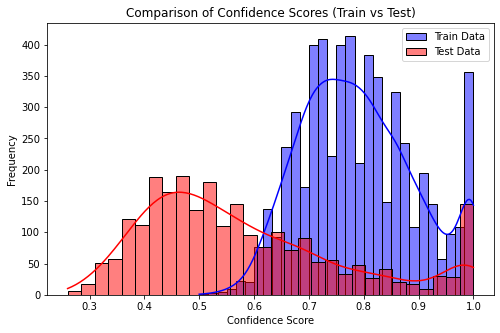

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the membership inference dataset
membership_data = pd.read_csv("membership_data.csv")

# Separate members (train data) and non-members (test data)
train_confidences = membership_data[membership_data['is_member'] == 1]['confidence']
test_confidences = membership_data[membership_data['is_member'] == 0]['confidence']

# Plot histogram to compare confidence scores
plt.figure(figsize=(8, 5))
sns.histplot(train_confidences, color='blue', label='Train Data', kde=True, bins=30)
sns.histplot(test_confidences, color='red', label='Test Data', kde=True, bins=30)
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.title("Comparison of Confidence Scores (Train vs Test)")
plt.legend()
plt.show()


In [6]:
# Load the attack model's predictions
attack_data = pd.read_csv("Test.csv")  # Replace with your actual attack output

# Sort by confidence for better visualization
attack_data = attack_data.sort_values(by="confidence", ascending=False)

# Show some correctly and incorrectly classified samples
print("=== High Confidence Training Data (Correctly Identified) ===")
print(attack_data[(attack_data["is_member"] == 1) & (attack_data["predicted"] == 1)].head(10))

print("\n=== High Confidence Test Data (Incorrectly Identified as Training) ===")
print(attack_data[(attack_data["is_member"] == 0) & (attack_data["predicted"] == 1)].head(10))

print("\n=== Low Confidence Training Data (Incorrectly Identified as Test) ===")
print(attack_data[(attack_data["is_member"] == 1) & (attack_data["predicted"] == 0)].head(10))


KeyError: 'confidence'

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "Train.csv"
data = pd.read_csv(file_path)

# Handling missing values
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].median(), inplace=True)  # Fill numerical with median

for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)  # Fill categorical with mode

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split features and target variable
X = data.drop(columns=['Segmentation', 'ID'])  # Remove target and ID columns
y = data['Segmentation']

# Verify dataset after preprocessing
data_info = {
    "cleaned_data_head": data.head(),
    "X_shape": X.shape,
    "y_shape": y.shape,
    "categorical_encodings": {col: list(label_encoders[col].classes_) for col in label_encoders}
}

data_info


{'cleaned_data_head':        ID  Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
 0  462809       1             0   22          0           5              1.0   
 1  462643       0             1   38          1           2              1.0   
 2  466315       0             1   67          1           2              1.0   
 3  461735       1             1   67          1           7              0.0   
 4  462669       0             1   40          1           3              1.0   
 
    Spending_Score  Family_Size  Var_1  Segmentation  
 0               2          4.0      3             3  
 1               0          3.0      3             0  
 2               2          1.0      5             1  
 3               1          2.0      5             1  
 4               1          6.0      5             0  ,
 'X_shape': (8068, 9),
 'y_shape': (8068,),
 'categorical_encodings': {'Gender': ['Female', 'Male'],
  'Ever_Married': ['No', 'Yes'],
  'Graduated': ['No', 'Yes

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score

# Load and preprocess the dataset
data = pd.read_csv("Train.csv")  # Load dataset

# Handle missing values
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical
        data[col].fillna(data[col].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save for inverse mapping later

# Separate features and target
X = data.drop(columns=['Segmentation'])  # Features
y = data['Segmentation']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Print completion message
print("Step 1: Model Training Completed")


Step 1: Model Training Completed


In [ ]:
# Get probability scores for training and test sets
y_train_probs = model.predict_proba(X_train).max(axis=1)  # Max confidence score per row
y_test_probs = model.predict_proba(X_test).max(axis=1)

# Save membership labels
train_membership = np.ones(len(y_train))  # 1 for train set
test_membership = np.zeros(len(y_test))  # 0 for test set

# Create a DataFrame to store confidence scores
membership_data = pd.DataFrame({
    'confidence': np.concatenate([y_train_probs, y_test_probs]),
    'is_member': np.concatenate([train_membership, test_membership])  # Labels
})

# Save data for attack
membership_data.to_csv("/mnt/data/membership_data.csv", index=False)

print("Step 2: Confidence Scores Saved for Attack Model")


In [ ]:
from sklearn.linear_model import LogisticRegression

# Load attack dataset
membership_data = pd.read_csv("/mnt/data/membership_data.csv")

# Split into features (confidence score) and labels (is_member)
X_attack = membership_data[['confidence']]
y_attack = membership_data['is_member']

# Train attack model (Logistic Regression)
attack_model = LogisticRegression()
attack_model.fit(X_attack, y_attack)

# Predict membership
y_attack_pred = attack_model.predict(X_attack)

# Compute accuracy & AUC
attack_accuracy = accuracy_score(y_attack, y_attack_pred)
attack_auc = roc_auc_score(y_attack, attack_model.predict_proba(X_attack)[:, 1])

print(f"Membership Inference Attack Accuracy: {attack_accuracy:.4f}")
print(f"Membership Inference Attack AUC: {attack_auc:.4f}")


In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset
train_data = pd.read_csv("Train.csv")  # Replace with actual filename

# Preprocessing (Handle missing values, encode categorical variables)
train_data.fillna(method='ffill', inplace=True)
X = train_data.drop(columns=['Segmentation'])  # Features
y = train_data['Segmentation']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the original (victim) model
victim_model = RandomForestClassifier(n_estimators=100, random_state=42)
victim_model.fit(X_train, y_train)

# Attacker queries the model
train_probs = victim_model.predict_proba(X_train).max(axis=1)  # Confidence scores
test_probs = victim_model.predict_proba(X_test).max(axis=1)

# Label data for attack model
train_labels = np.ones(len(X_train))  # 1 = in training set
test_labels = np.zeros(len(X_test))  # 0 = not in training set

# Create attack dataset
attack_X = np.concatenate([train_probs, test_probs]).reshape(-1, 1)
attack_y = np.concatenate([train_labels, test_labels])

# Train an attack model
attack_train_X, attack_test_X, attack_train_y, attack_test_y = train_test_split(attack_X, attack_y, test_size=0.3, random_state=42)
attack_model = RandomForestClassifier(n_estimators=100, random_state=42)
attack_model.fit(attack_train_X, attack_train_y)

# Evaluate the attack
attack_preds = attack_model.predict(attack_test_X)
attack_acc = accuracy_score(attack_test_y, attack_preds)
attack_auc = roc_auc_score(attack_test_y, attack_preds)

print(f"Membership Inference Attack Accuracy: {attack_acc:.4f}")
print(f"Membership Inference Attack AUC: {attack_auc:.4f}")


ValueError: could not convert string to float: 'Male'

In [ ]:
import numpy as np

# Function to query the model like an attacker
def query_model(sample):
    sample_array = np.array(sample).reshape(1, -1)  # Reshape for prediction
    confidence_scores = model.predict_proba(sample_array).max(axis=1)[0]  # Get max probability
    prediction = model.predict(sample_array)[0]  # Get predicted class
    return prediction, confidence_scores

# Example query (modify these values based on your dataset)
query_sample = [50, 1, 2, 10000, 0, 2, 1, 3, 5, 2]  # Example feature values

# Get model response
predicted_class, confidence = query_model(query_sample)
print(f"🔍 Prediction: {predicted_class}, Confidence Score: {confidence}")


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score

# Load and preprocess the dataset
data = pd.read_csv("Train.csv")  # Load dataset

# Handle missing values
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical
        data[col].fillna(data[col].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save for inverse mapping later

# Separate features and target
X = data.drop(columns=['Segmentation'])  # Features
y = data['Segmentation']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(X_train.head())
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Print completion message
print("Step 1: Model Training Completed")


C:\Users\Rahul Bisht\AppData\Local\Temp\ipykernel_9240\1534303083.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Rahul Bisht\AppData\Local\Temp\ipykernel_9240\1534303083.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

          ID  Gender  Ever_Married  Age  Graduated  Profession  \
5015  459344       0             1   76          1           0   
6688  464230       1             0   33          0           2   
6116  460735       1             1   35          1           2   
4518  467077       1             1   61          1           0   
6194  464835       1             0   19          0           5   

      Work_Experience  Spending_Score  Family_Size  Var_1  
5015              1.0               1          2.0      5  
6688              0.0               2          4.0      0  
6116              1.0               0          4.0      2  
4518              1.0               0          5.0      5  
6194              1.0               2          6.0      3  
Step 1: Model Training Completed


In [16]:
import numpy as np

# Function to query the model with a sample input
def query_model(sample):
    sample_array = np.array(sample).reshape(1, -1)  # Reshape for prediction
    prediction = model.predict(sample_array)[0]  # Get predicted class
    confidence = model.predict_proba(sample_array).max(axis=1)[0]  # Get max probability
    return prediction, confidence

# Example: Take a sample from the dataset (modify if needed)
query_sample = {458989,Female,Yes,36,Yes,Engineer,0,Low,1,Cat_6,B}  # Picking a real test sample
predicted_class, confidence_score = query_model(query_sample)

print(f"🔍 Query Sample: {query_sample}")
print(f"✅ Prediction: {predicted_class}, Confidence Score: {confidence_score:.4f}")


NameError: name 'Female' is not defined

In [2]:
import numpy as np

# Define the query input (same order as features in training data)
query_input = [461979,'Male','Yes',35,'Yes','Artist',9.0,'High',2.0,'Cat_7']

# Convert categorical features using saved LabelEncoders
for i, col in enumerate(X.columns):
    if col in label_encoders:  # If the column was label-encoded
        query_input[i] = label_encoders[col].transform([query_input[i]])[0]  

# Convert to NumPy array and reshape for model prediction
query_array = np.array(query_input).reshape(1, -1)

# Get model prediction and confidence score
predicted_class = model.predict(query_array)[0]
confidence_score = model.predict_proba(query_array).max(axis=1)[0]

# Decode the predicted class back to its original category
decoded_prediction = label_encoders['Segmentation'].inverse_transform([predicted_class])[0]

# Print results
print(f"🔍 Processed Query Input: {query_input}")
print(f"✅ Predicted Class: {decoded_prediction}, Confidence Score: {confidence_score:.4f}")


🔍 Processed Query Input: [461979, np.int64(1), np.int64(1), 35, np.int64(1), np.int64(0), 9.0, np.int64(1), 2.0, np.int64(6)]
✅ Predicted Class: C, Confidence Score: 0.5000


C:\ProgramsSimplified\Python3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramsSimplified\Python3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
df_query = pd.read_csv("query_data.csv")

for col in df_query.columns:
    if col in label_encoders:  
        df_query[col] = label_encoders[col].transform(df_query[col])

predictions = model.predict(df_query)
confidence_scores = model.predict_proba(df_query).max(axis=1)

decoded_predictions = label_encoders['Segmentation'].inverse_transform(predictions)
print(decoded_predictions)
print(confidence_scores)


['A' 'A' 'A' 'C' 'C' 'C' 'C' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'B'
 'C' 'C' 'C']
[0.39 0.4  0.38 0.5  0.59 0.59 0.44 0.36 0.37 0.35 0.36 0.38 0.56 0.5
 0.44 0.48 0.38 0.4  0.45 0.58 0.41]
